In [11]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.icesat2
reload(asp_plot.icesat2)

from asp_plot.icesat2 import ICESat2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
try:
    atl06 = gpd.read_file(os.path.join(directory, "icesat_data", "atl06_all.gpkg"))
    atl06_clean = gpd.read_file(os.path.join(directory, "icesat_data", "atl06_cleaned.gpkg"))

    icesat = ICESat2(
        dem_fn=dem_fn, 
        geojson_fn=geojson_fn,
        aligned_dem_fn=aligned_dem_fn,
        atl06=atl06,
        atl06_clean=atl06_clean
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
if icesat.atl06 is None:
    icesat.pull_atl06_data(
        esa_worldcover=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_all")
    )

icesat.atl06

,time,w_surface_window_final,gt,h_sigma,cycle,pflags,rgt,y_atc,region,x_atc,...,rms_misfit,segment_id,spot,n_fit_photons,h_mean,esa-worldcover-.time,esa-worldcover-.file_id,esa-worldcover-.value,esa-worldcover-.flags,geometry
0,2018-10-19 01:22:42.849,3.000000e+00,10,0.033456,1,0,312,2075.261719,3,7947945.5,...,0.057618,396539,6,5,0.712761,1.309046e+12,811748818944,90.0,0,POINT (-156.33771 71.24194)
1,2018-10-19 01:22:42.852,3.000000e+00,10,0.019844,1,0,312,2075.311279,3,7947965.5,...,0.059513,396540,6,10,0.823991,1.309046e+12,811748818944,90.0,0,POINT (-156.33778 71.24212)
2,2018-10-19 01:22:42.855,3.000000e+00,10,0.024544,1,0,312,2075.361572,3,7947985.5,...,0.093339,396541,6,15,0.905593,1.309046e+12,811748818944,90.0,0,POINT (-156.33786 71.2423)
3,2018-10-19 01:22:42.858,3.000000e+00,10,0.021550,1,0,312,2075.408936,3,7948005.5,...,0.091363,396542,6,18,0.905599,1.309046e+12,811748818944,90.0,0,POINT (-156.33793 71.24247)
4,2018-10-19 01:22:42.861,3.000000e+00,10,0.024073,1,0,312,2075.448486,3,7948025.5,...,0.104050,396543,6,19,0.946535,1.309046e+12,811748818944,90.0,0,POINT (-156.338 71.24265)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325225,2024-04-12 14:33:11.405,7.733270e+20,60,0.063659,23,0,381,-3294.771729,5,12123277.0,...,0.220518,605225,1,12,8.967862,1.309046e+12,137438953472,90.0,0,POINT (-156.80443 71.248)
325226,2024-04-12 14:33:11.407,1.031103e+21,60,0.041452,23,0,381,-3294.732910,5,12123297.0,...,0.149359,605226,1,13,8.935914,1.309046e+12,137438953472,30.0,0,POINT (-156.8045 71.24782)
325227,2024-04-12 14:33:11.410,1.031103e+21,60,0.051959,23,0,381,-3294.683838,5,12123317.0,...,0.172222,605227,1,11,9.029394,1.309046e+12,137438953472,90.0,0,POINT (-156.80457 71.24765)
325228,2024-04-12 14:33:11.413,1.031103e+21,60,0.053021,23,0,381,-3294.628662,5,12123337.0,...,0.198097,605228,1,14,9.014047,1.309046e+12,137438953472,90.0,0,POINT (-156.80464 71.24747)


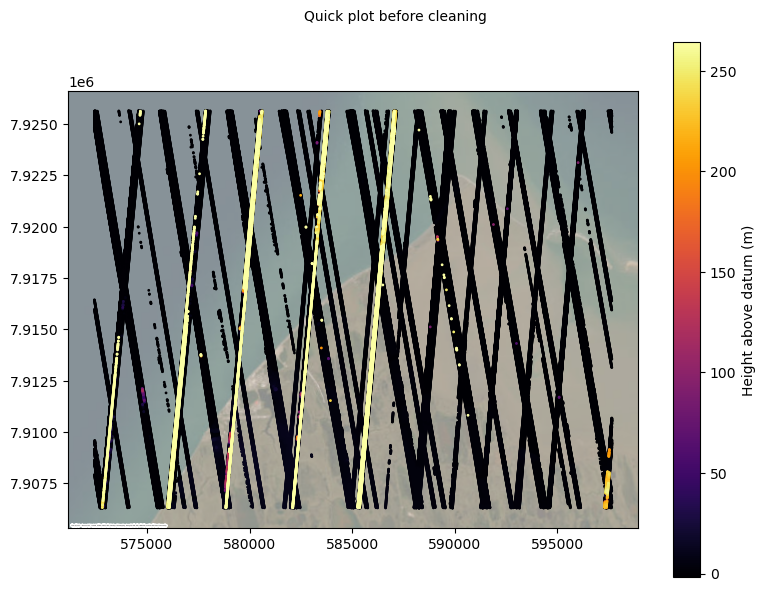

In [5]:
icesat.title = "Quick plot before cleaning"

icesat.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)

In [6]:
# Get only the data that is coincident with the DEM acquisition
if icesat.atl06_clean is None:
    icesat.clean_atl06(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        save_to_csv=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_cleaned"),
    )

icesat.atl06_clean

,time,rgt,dh_fit_dx,gt,h_sigma,spot,pflags,n_fit_photons,w_surface_window_final,segment_id,...,rms_misfit,h_mean,x_atc,y_atc,cycle,esa-worldcover-.value,esa-worldcover-.flags,esa-worldcover-.file_id,esa-worldcover-.time,geometry
0,2022-04-17 01:15:56.210,381,-0.047549,10,0.048773,1,0,138,1.031103e+21,604607,...,0.512081,0.556896,12110909.0,3311.720459,15,60.0,0,627065225216,1.309046e+12,POINT (-156.57676 71.35026)
1,2022-04-17 01:15:56.213,381,-0.022097,10,0.027673,1,0,300,1.031103e+21,604608,...,0.452866,-0.066967,12110929.0,3311.739014,15,50.0,0,627065225216,1.309046e+12,POINT (-156.57684 71.35008)
2,2022-04-17 01:15:56.467,381,0.009508,10,0.006363,1,0,379,1.031103e+21,604698,...,0.123681,-0.307942,12112730.0,3309.855713,15,90.0,0,627065225216,1.309046e+12,POINT (-156.5835 71.33408)
3,2022-04-17 01:15:56.470,381,0.004371,10,0.006248,1,0,362,1.031103e+21,604699,...,0.118864,-0.187099,12112750.0,3309.832031,15,90.0,0,627065225216,1.309046e+12,POINT (-156.58357 71.3339)
4,2022-04-17 01:15:56.473,381,0.003172,10,0.005804,1,0,378,1.031103e+21,604700,...,0.112785,-0.125473,12112770.0,3309.790283,15,90.0,0,627065225216,1.309046e+12,POINT (-156.58365 71.33372)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2022-04-17 01:15:57.725,381,-0.001089,60,0.017196,6,0,69,1.031103e+21,605033,...,0.118455,10.326173,12119434.0,-3314.025146,15,90.0,0,627065225216,1.309046e+12,POINT (-156.79129 71.28218)
792,2022-04-17 01:15:57.728,381,0.003520,60,0.013848,6,0,84,1.031103e+21,605034,...,0.123033,10.347944,12119454.0,-3314.061279,15,90.0,0,627065225216,1.309046e+12,POINT (-156.79136 71.282)
793,2022-04-17 01:15:57.731,381,-0.002322,60,0.015876,6,0,64,1.031103e+21,605035,...,0.125393,10.359776,12119474.0,-3314.073975,15,90.0,0,627065225216,1.309046e+12,POINT (-156.79143 71.28182)
794,2022-04-17 01:15:57.733,381,0.005066,60,0.017182,6,0,54,1.031103e+21,605036,...,0.119788,10.389209,12119494.0,-3314.068115,15,90.0,0,627065225216,1.309046e+12,POINT (-156.7915 71.28164)


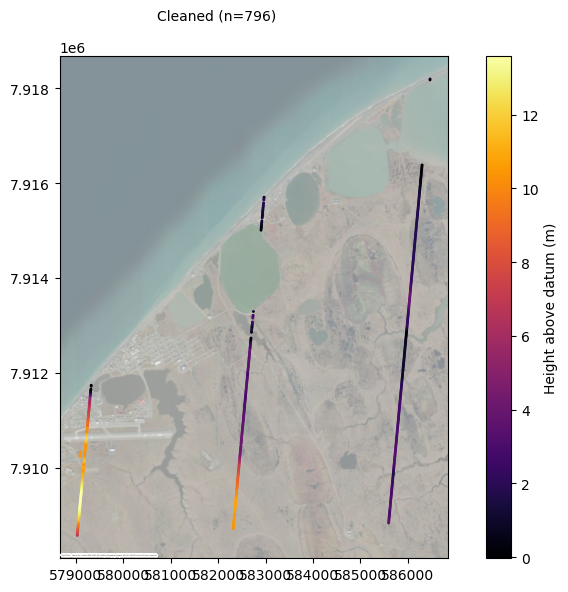

In [6]:
icesat.title = f"Cleaned (n={icesat.atl06_clean.shape[0]})"

icesat.plot_atl06(
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)

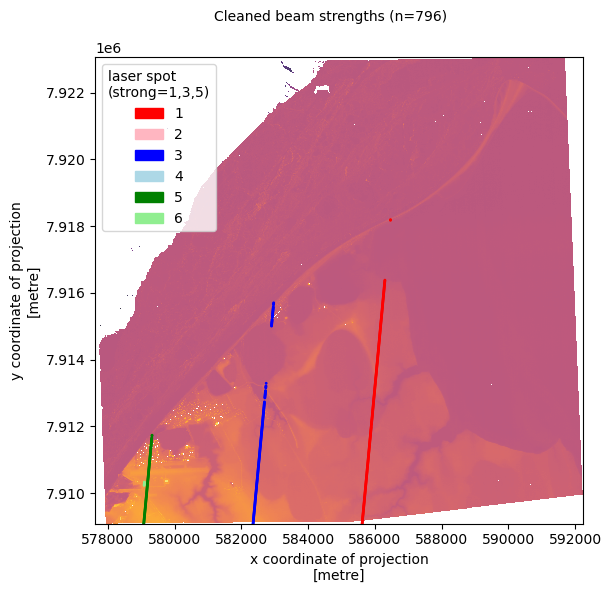

In [7]:
icesat.title = f"Cleaned beam strengths (n={icesat.atl06_clean.shape[0]})"

icesat.plot_atl06(
    clean=True,
    plot_beams=True,
    use_dem_basemap=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



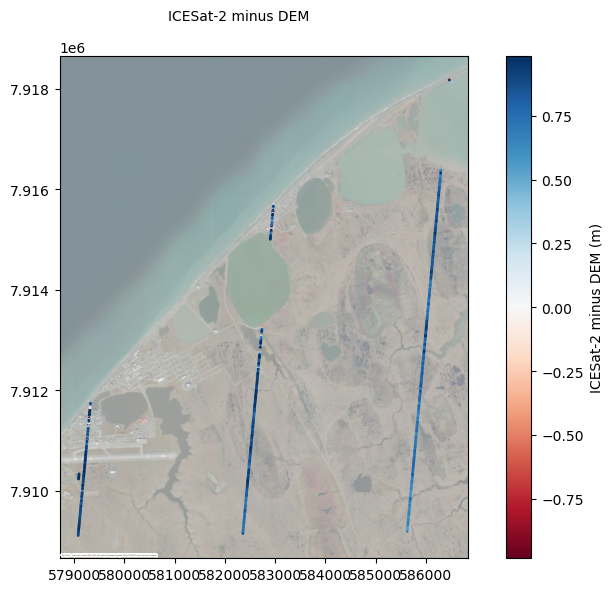

In [17]:
icesat.title = "ICESat-2 minus DEM"
icesat.compare_atl06_to_dem(**ctx_kwargs)

In [18]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06(
    atl06_csv=os.path.join(icesat_directory, "atl06_cleaned.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

ValueError: 
Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.


In [19]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

ValueError: 
Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.


In [20]:
# After pc_align, replace the dem with the new translated dem
icesat.aligned_dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



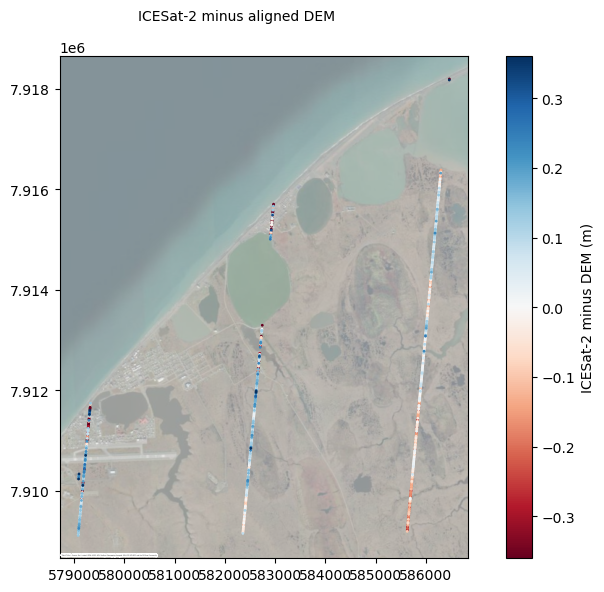

In [21]:
# Quickly compare the translated DEM to the ATL06 data
icesat.title = "ICESat-2 minus aligned DEM"
icesat.compare_atl06_to_dem(use_aligned_dem=True, **ctx_kwargs)

In [22]:
# Gather a larger subset of data for validation
icesat.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    filename_to_save=os.path.join(icesat_directory, "atl06_cleaned_MarchAprilMay_allTime_for_validation"),
)

AttributeError: 'Index' object has no attribute 'month'

In [ ]:
# Validate (before)
icesat.dem_fn = dem_fn

icesat.title = f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.compare_atl06_to_dem(**ctx_kwargs)

icesat.title = f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.atl06_dem_histogram()

In [ ]:
# Validate (after)
icesat.dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")

icesat.title = f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.compare_atl06_to_dem(**ctx_kwargs)

icesat.title = f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.atl06_dem_histogram()